In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualising data
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [10]:
df = pd.read_csv('mutual_funds_data.csv', encoding = 'unicode_escape')

In [11]:
df.shape

(814, 20)

In [12]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna â Dir Gr...,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [14]:
pd.isnull(df)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
810,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
811,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
pd.isnull(df).sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [16]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

In [18]:
#rename column
df.rename(columns= {'fund_size_cr':'fund_size'})

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna â Dir Gr...,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan â Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


In [19]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [22]:
df[['min_sip','min_lumpsum','fund_size_cr','risk_level','rating']].describe()

,min_sip,min_lumpsum,fund_size_cr,risk_level,rating
count,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,3812.854214,4.400491,2.641278
std,369.184517,2514.619513,7181.479475,1.814741,1.463476
min,0.000000,0.000000,2.380000,1.000000,0.000000
25%,150.000000,500.000000,175.250000,3.000000,2.000000
50%,500.000000,5000.000000,940.500000,6.000000,3.000000
75%,1000.000000,5000.000000,3819.000000,6.000000,4.000000
max,2000.000000,25000.000000,57052.000000,6.000000,5.000000


In [23]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

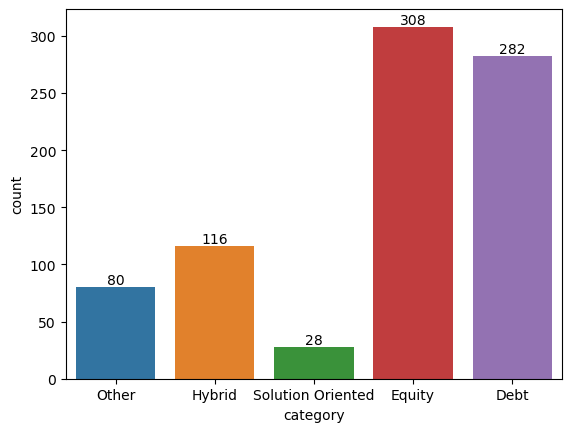

In [26]:
ax = sns.countplot(x='category', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

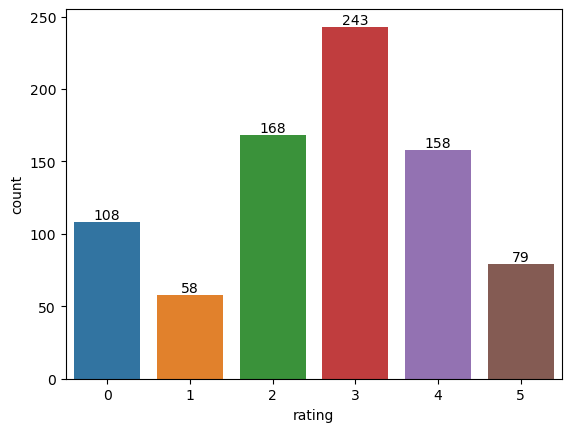

In [27]:
ax = sns.countplot(x='rating', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df.groupby(['amc_name'],as_index=False)['min_lumpsum'].sum().sort_values(by='min_lumpsum',ascending=False)

,amc_name,min_lumpsum
11,ICICI Prudential Mutual Fund,195599
30,SBI Mutual Fund,184000
10,HSBC Mutual Fund,170500
33,Tata Mutual Fund,166000
8,Franklin Templeton Mutual Fund,146500
18,Kotak Mahindra Mutual Fund,128700
36,UTI Mutual Fund,110100
4,Baroda BNP Paribas Mutual Fund,107500
25,Nippon India Mutual Fund,101100
20,LIC Mutual Fund,100500


In [32]:
df.groupby(['amc_name'],as_index=False)['fund_size_cr'].sum().sort_values(by='fund_size_cr',ascending=False)

,amc_name,fund_size_cr
11,ICICI Prudential Mutual Fund,445257.00
9,HDFC Mutual Fund,418426.00
30,SBI Mutual Fund,397745.00
18,Kotak Mahindra Mutual Fund,255952.00
0,Aditya Birla Sun Life Mutual Fund,227218.00
1,Axis Mutual Fund,221203.00
25,Nippon India Mutual Fund,204320.00
36,UTI Mutual Fund,153056.00
6,DSP Mutual Fund,107188.00
22,Mirae Asset Mutual Fund,107063.00


<Axes: xlabel='amc_name', ylabel='fund_size_cr'>

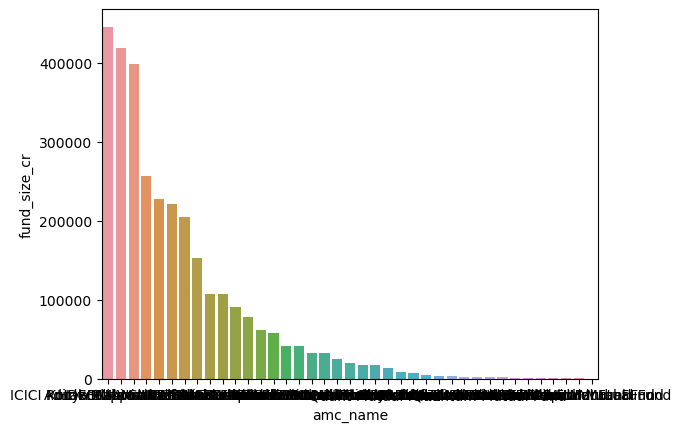

In [33]:
Total_fund_size = df.groupby(['amc_name'],as_index=False)['fund_size_cr'].sum().sort_values(by='fund_size_cr',ascending=False)

sns.barplot(x = 'amc_name',y = 'fund_size_cr', data = Total_fund_size )

In [37]:
df['1-year return'] = (df['returns_1yr']/100)
average_1_year_return = df['1-year return'].mean()
print("Average 1-year return:", average_1_year_return)

Average 1-year return: 0.03921375921375921


In [38]:
df['3-year return'] = (df['returns_3yr']/100)
average_3_year_return = df['3-year return'].mean()
print("Average 3-year return:", average_3_year_return)

Average 3-year return: 0.18525346784363178


In [39]:
df['5-year return'] = (df['returns_5yr']/100)
average_5_year_return = df['5-year return'].mean()
print("Average 5-year return:", average_5_year_return)

Average 5-year return: 0.09490726429675425


<Axes: xlabel='category', ylabel='count'>

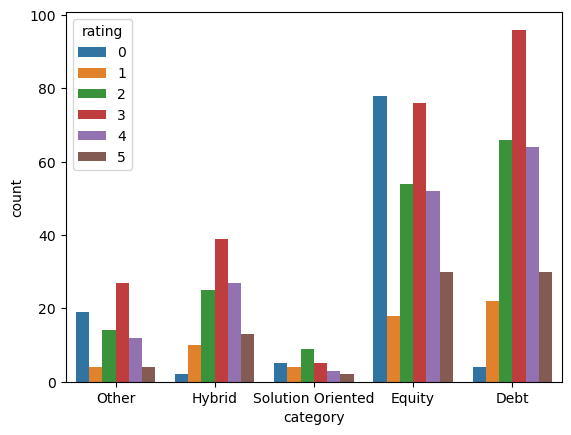

In [44]:
sns.countplot(data=df, x = 'category', hue = 'rating')

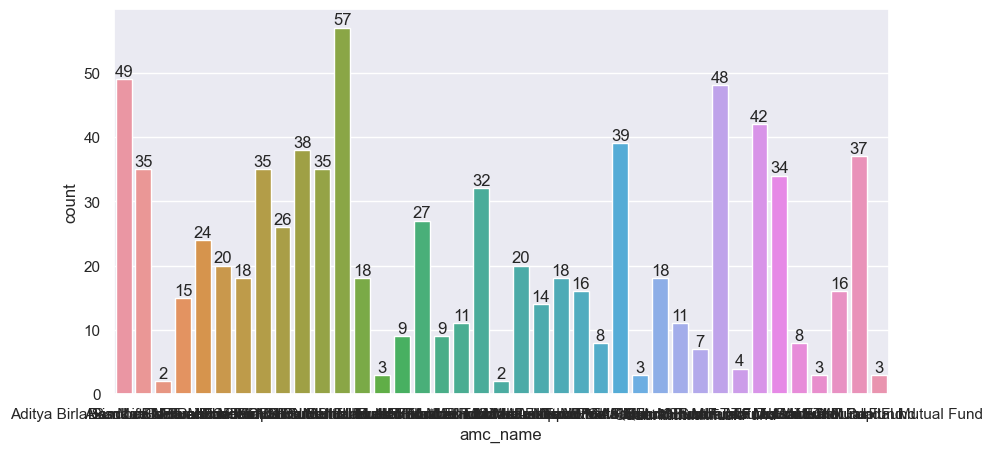

In [46]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(data=df, x ='amc_name')

for bars in ax.containers:
    ax.bar_label(bars)